<a href="https://colab.research.google.com/github/The-Jimmy/ai-builder-bookIdentifier/blob/main/BGE_m3_BookIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 29.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_c

In [2]:
from FlagEmbedding import BGEM3FlagModel
import pandas as pd
import numpy as np
import torch

model = BGEM3FlagModel('BAAI/bge-m3',
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation
# model.eval()

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

colbert_linear.pt:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

imgs/.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

imgs/bm25.jpg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

imgs/long.jpg:   0%|          | 0.00/485k [00:00<?, ?B/s]

imgs/miracl.jpg:   0%|          | 0.00/448k [00:00<?, ?B/s]

imgs/mkqa.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

imgs/others.webp:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/127k [00:00<?, ?B/s]

imgs/nqa.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

onnx/Constant_7_attr__value:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

onnx/config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

onnx/special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/725k [00:00<?, ?B/s]

model.onnx_data:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

onnx/tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

sparse_linear.pt:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

In [23]:
data = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/DataCollection/TESTUNCLEANbookquestions.csv'))
data2 = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/DataCollection/TRAINbookquestions.csv'))
data3 = pd.read_csv("/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/DataCollection/booksummaries.txt",
                              header=None,sep="\t",
                              names=["ID", "Freebase ID", "Book Name", "Book Author", "Pub date", "Genres", "Summary"])
df = pd.concat([data, data2])
df = df.merge(data3, on='ID', how='left')
df = df.rename(columns={'Book Name_x': 'Book Name'})
df = df[['ID', 'Book Name', 'Book Author', 'Questions', 'Summary']]


ques = []
for question in df['Questions']:
    q = question.split('\n')
    for i in range(len(q)):
        q[i] = q[i][3:]
    ques.append(q)

df['Questions'] = ques

df

,ID,Book Name,Book Author,Questions,Summary
0,620,Animal Farm,George Orwell,[Do you have any books that explore themes of ...,"Old Major, the old boar on the Manor Farm, ca..."
1,986,The Plague,Albert Camus,[Can you recommend a book that explores the th...,The text of The Plague is divided into five p...
2,1756,An Enquiry Concerning Human Understanding,David Hume,[Can you recommend a book on the philosophy of...,The argument of the Enquiry proceeds by a ser...
3,2080,A Fire Upon the Deep,Vernor Vinge,[Does the book explore the impact of technolog...,The novel posits that space around the Milky ...
4,2152,All Quiet on the Western Front,Erich Maria Remarque,[Can you recommend a book that portrays the ho...,"The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...
16339,36934824,Under Wildwood,Colin Meloy,[Can you recommend a book that transports me t...,"Prue McKeel, having rescued her brother from ..."
16340,37054020,Transfer of Power,Vince Flynn,[Can you recommend a thriller novel that invol...,The reader first meets Rapp while he is doing...
16341,37122323,Decoded,Jay-Z,[I'm looking for an autobiography that explore...,The book follows very rough chronological ord...
16342,37132319,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,[Do you have any books that analyze current po...,Colbert addresses topics including Wall Stree...


# Embed + finding similarity

In [20]:
#EMBEDDING ALL SUMMARY. DO NOT RUN!!
sentence2 = []
for i in df['Summary']:
  sentence2.append(i)

with torch.no_grad():
  embeddings_2 = model.encode(sentence2,
                              batch_size=4,       # GPU: T4 use 2 / L4 use 4
                              max_length=8192,
                              )['dense_vecs']

# np.save('BGE_embeddings_2.npy', embeddings_2)   #Un-comment if want to download

In [ ]:
print(np.load('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/BGE_embeddings_2.npy'))

In [24]:
embeddings_2 = np.load('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/BGE_embeddings_2.npy')

lim_df = df.head(200)
scores = []

from tqdm import tqdm

for question in tqdm(lim_df['Questions'], desc="Scores"):
  for sen1 in question:
    embeddings_1 = model.encode(sen1,
                              batch_size=12,
                              max_length=8192,
                              )['dense_vecs']
    similarity = embeddings_1 @ embeddings_2.T
    scores.append(similarity)

scores = np.array_split(scores, len(lim_df))

Scores: 100%|██████████| 200/200 [02:59<00:00,  1.11it/s]


In [ ]:
len(scores)

200

# Finding average

In [ ]:
scores

In [25]:
#based on ID
acc = 0
labels = df['ID'].tolist()
for sco, lab in zip(scores, labels):
  for s in sco:
    pred_ID = df['ID'][np.argmax(s)]
    acc += int(pred_ID == lab)
accruacy = acc / (len(lim_df)*8)
print(accruacy)

0.060625


## Top-k

In [ ]:
from tqdm import tqdm

top_k = 100
top_k_acc = []
labels = df['ID'].tolist()
for k in tqdm(range(1, top_k+1)):
  acc = 0
  for sco, lab in zip(scores, labels):
      for s in sco:
          topk = np.argsort(s)[-k:]
          for t in topk:
              pred_ID = df['ID'].iloc[t]
              acc += int(pred_ID == lab)
  accuracy = acc / (len(lim_df)*8)
  top_k_acc.append(accuracy)
print(top_k_acc)

100%|██████████| 100/100 [06:12<00:00,  3.72s/it]

[0.06, 0.078125, 0.08875, 0.1025, 0.11, 0.118125, 0.1225, 0.1325, 0.135625, 0.138125, 0.1425, 0.145625, 0.14875, 0.1525, 0.155, 0.15625, 0.16, 0.161875, 0.16375, 0.16375, 0.165, 0.1675, 0.17, 0.175, 0.175625, 0.1775, 0.18, 0.18125, 0.183125, 0.185625, 0.1875, 0.19125, 0.1925, 0.195, 0.19625, 0.19875, 0.200625, 0.201875, 0.204375, 0.20625, 0.209375, 0.2125, 0.213125, 0.214375, 0.216875, 0.219375, 0.2225, 0.2225, 0.223125, 0.224375, 0.225625, 0.22625, 0.22875, 0.229375, 0.23, 0.23125, 0.2325, 0.233125, 0.234375, 0.235625, 0.23625, 0.2375, 0.2375, 0.23875, 0.239375, 0.240625, 0.240625, 0.240625, 0.24125, 0.2425, 0.243125, 0.243125, 0.24375, 0.244375, 0.245625, 0.248125, 0.250625, 0.25125, 0.2525, 0.255, 0.255625, 0.256875, 0.259375, 0.260625, 0.261875, 0.264375, 0.265, 0.265, 0.26625, 0.266875, 0.266875, 0.268125, 0.268125, 0.268125, 0.27, 0.271875, 0.273125, 0.275, 0.2775, 0.278125]


In [26]:
k = 2
labels = df['ID'].tolist()
acc = 0

for sco, lab in zip(scores, labels):
    for s in sco:
        topk = np.argsort(s)[-k:]
        for t in topk:
            pred_ID = df['ID'].iloc[t]
            acc += int(pred_ID == lab)
accuracy = acc / (len(lim_df)*8)
print(accuracy)

0.078125


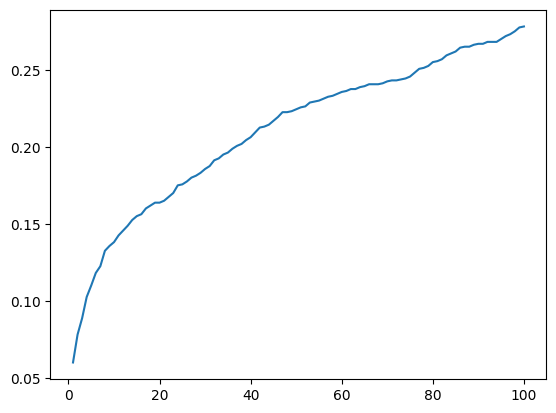

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array(list(range(1, top_k+1)))
y1 = np.array(top_k_acc)

plt.plot(x1, y1)
plt.show()

# Reranking

In [5]:
from FlagEmbedding import FlagReranker
reranker = FlagReranker('BAAI/bge-reranker-v2-m3', use_fp16=True)
from tqdm import tqdm

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

In [6]:
k = 100
pred_ID_list = []

for numbook, sco in enumerate(tqdm(scores)):
    for numquestion, s in enumerate(sco):
        topk = np.argsort(s)[-k:]
        top_k_qs = []
        for t in topk:
            pred_sum = df['Summary'].iloc[t]
            pred_ques = df['Questions'].iloc[numbook][numquestion]
            pred = [pred_ques, pred_sum]
            top_k_qs.append(pred)
        rrscore = reranker.compute_score(top_k_qs, normalize=True)
        maxindex = np.argmax(rrscore)
        pred_ID = df['ID'][topk[maxindex]]
        pred_ID_list.append(pred_ID)

100%|██████████| 200/200 [1:13:07<00:00, 21.94s/it]


In [8]:
pred_ID_list

[8964938,
 16987881,
 620,
 2086583,
 6481658,
 2716264,
 8013965,
 31789220,
 30510037,
 21749977,
 682421,
 22686057,
 8643690,
 24412987,
 27484634,
 267083,
 1756,
 1756,
 10555897,
 4311863,
 9490321,
 1080292,
 12906548,
 84449,
 3202072,
 2080,
 531939,
 665839,
 7673895,
 164304,
 1720972,
 59844,
 15608,
 2152,
 14465041,
 7347634,
 3071403,
 3436881,
 21128964,
 2466295,
 14598224,
 2890,
 625530,
 19577235,
 5705316,
 192303,
 1371465,
 4923146,
 764885,
 11019466,
 3887859,
 764885,
 8025464,
 10032938,
 14813480,
 242555,
 4082,
 4081,
 4354062,
 10411443,
 18746505,
 3557621,
 16980181,
 20205559,
 380015,
 28303004,
 15486863,
 4082,
 18676011,
 2360481,
 4082,
 22739473,
 4331,
 4331,
 8547,
 4331,
 4331,
 1286615,
 4331,
 4331,
 4332,
 4332,
 23748317,
 8547,
 4332,
 23748317,
 27525614,
 4332,
 8547,
 4376,
 18187,
 4376,
 4376,
 4376,
 8547,
 4331,
 11400295,
 1799959,
 14533960,
 7533582,
 8547,
 16988081,
 26769799,
 12906548,
 9594387,
 7911315,
 444599,
 23748317

In [7]:
acc = 0
labels = []

for i in df['ID'].tolist():
  for j in range(8):
    labels.append(i)

for ID, lab in zip(pred_ID_list, labels):
  acc += int(ID == lab)

accruacy = acc / len(pred_ID_list)
print(accruacy)

0.11125


# Error analysis #2

In [6]:
sen1 = """I want a book that takes you on an exciting journey into your own body, exploring the genetic building blocks that make up not only who you are but also all life on earth."""

RAW

In [ ]:
embeddings_2 = np.load('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/BGE_embeddings_2.npy')

k = 200
sen1 = sen1

embeddings_1 = model.encode(sen1,
                              batch_size=12,
                              max_length=8192,
                              )['dense_vecs']
similarity = embeddings_1 @ embeddings_2.T

topk = np.argsort(similarity)[-k:]
topk = np.flip(topk)
for n, t in  enumerate(topk):
  print(n+1, df['Book Name'][t])

1 Icarus at the Edge of Time
2 Son of Scarface
3 Wiggle
4 The Planet Savers
5 This Alien Shore
6 Under the Triple Suns
7 A Happy Healthy You
8 The Bisexual Option
9 The Hundred Year Lie
10 Earth
11 The Blind Spot
12 An American Demon: A Memoir
13 The Bloke's Guide To Pregnancy
14 You Better Not Cry: Stories for Christmas
15 Surfacing
16 Outerbridge Reach
17 Year of the Intern
18 Noir austral
19 Radix
20 Ladder of Years
21 The Crucible of Time
22 Heartbeat
23 The Forbidden Garden
24 Network Analysis and Ethnographic Problems
25 The Boat of a Million Years
26 The Ballad of Beta-2
27 People of the Comet
28 The Visitors
29 Evolution
30 Man After Man: An Anthropology of the Future
31 Mind Transfer
32 Pollard
33 Chance and Necessity
34 The Troika
35 Exit Wounds
36 Pattern for Conquest
37 Unweaving the Rainbow: Science, Delusion and the Appetite for Wonder
38 The Green Brain
39 The World of Null-A
40 The World Below
41 The Snake's Skin
42 The Starmen
43 Dragonology: The Complete Book of Drago

Reranking

In [13]:
from FlagEmbedding import FlagReranker
reranker = FlagReranker('BAAI/bge-reranker-v2-m3', use_fp16=True)

embeddings_2 = np.load('/content/drive/MyDrive/Coding/AI-Builder/TheActualProject/BGE_embeddings_2.npy')

k = 200
sen1 = sen1

embeddings_1 = model.encode(sen1,
                              batch_size=12,
                              max_length=8192,
                              )['dense_vecs']
similarity = embeddings_1 @ embeddings_2.T

top_k_qs = []
topk = np.argsort(similarity)[-k:]

for t in topk:
    pred_sum = df['Summary'].iloc[t]
    pred_ques = sen1
    pred = [pred_ques, pred_sum]
    top_k_qs.append(pred)
rrscore = reranker.compute_score(top_k_qs, normalize=True)
rrscore_index = np.argsort(rrscore)

pred_book = []
for rr in rrscore_index:
  pred_book.append(f"{df['Book Name'][topk[rr]]} by {df['Book Author'][topk[rr]]}")

pred_book.reverse()
for n, pred in enumerate(pred_book):
  print((f"{n+1}:"), pred)

Compute Scores: 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

1: Man After Man: An Anthropology of the Future by nan
2: Evolution by Stephen Baxter
3: The Greatest Show on Earth: The Evidence for Evolution by Richard Dawkins
4: Blood Music by Greg Bear
5: The Ancestor's Tale by Richard Dawkins
6: Invasion by Robin Cook
7: The Man Who Awoke by nan
8: The Third Millennium: A History of the World AD 2000-3000 by nan
9: The Green Brain by Frank Herbert
10: Chance and Necessity by Jacques Monod
11: The Genesis Quest by nan
12: To Live Again by Robert Silverberg
13: Millennium by John Varley
14: Dawkins vs. Gould by Kim Sterelny
15: The Celestine Prophecy by James Redfield
16: Star Maker by Olaf Stapledon
17: The Witch of Portobello by Paulo Coelho
18: Manifold: Time by Stephen Baxter
19: The Gifts of the Body by Rebecca Brown
20: Etidorhpa by John Uri Lloyd
21: The Fourth Dimension by Charles Howard Hinton
22: The Tenth Insight: Holding the Vision by James Redfield
23: Soul Mountain by Gao Xingjian
24: Engine Summer by John Crowley
25: Ethics by Baruc

In [ ]:
import torch
from transformers import pipeline

hf_name = 'pszemraj/led-large-book-summary'

summarizer = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

model.safetensors:  15%|#5        | 283M/1.84G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:

for sum in df['Summary']:
  wall_of_text = sum

  result = summarizer(
      wall_of_text,
      min_length=16,
      max_length=256,
      no_repeat_ngram_size=3,
      encoder_no_repeat_ngram_size=3,
      repetition_penalty=3.5,
      num_beams=4,
      early_stopping=True,
  )


Input ids are automatically padded from 1199 to 2048 to be a multiple of `config.attention_window`: 1024


In [ ]:
print(result)

[{'summary_text': 'The animals revolt against Mr. Jones and replace him with two pigs on the manor farm, which is renamed "animal Farm" after he was driven from it by Jones. They adopt the seven commandments of Animalistic philosophy and start to educate the animals in reading, writing and doing arithmetic. Soon they develop their own philosophy, officially called Animalism, which essentially means that all animals are created equal but some are better than others. The narrator points out how easily this philosophy can be changed into propaganda. A further ironic twist is presented here when the pigs discover that their new philosophy is quite literal: rather than seeking to unite the animals against the human beings who dominate them, they become enamored of each other and eventually join forces with one another.'}]
